In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [136]:
df = pd.read_csv("../Ignatieva/data/raw/test_scores.csv")

In [66]:
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           1984 non-null   object 
 1   school_setting   1984 non-null   object 
 2   school_type      1984 non-null   object 
 3   classroom        1984 non-null   object 
 4   teaching_method  1984 non-null   object 
 5   n_student        1984 non-null   float64
 6   student_id       1984 non-null   object 
 7   gender           1984 non-null   object 
 8   lunch            1984 non-null   object 
 9   pretest          1984 non-null   float64
 10  posttest         1984 non-null   float64
dtypes: float64(3), object(8)
memory usage: 170.6+ KB


In [68]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
school,1984,23,GOOBU,147,NaN,NaN,NaN,NaN,NaN,NaN,NaN
school_setting,1984,3,Urban,841,NaN,NaN,NaN,NaN,NaN,NaN,NaN
school_type,1984,2,Public,1463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
classroom,1984,97,ZBH,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
teaching_method,1984,2,Standard,1274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
n_student,1984.0,NaN,NaN,NaN,22.769153,4.248477,14.0,20.0,22.0,27.0,31.0
student_id,1984,1984,2FHT3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,1984,2,Male,1011,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lunch,1984,2,Does not qualify,1135,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pretest,1984.0,NaN,NaN,NaN,54.980847,13.558027,22.0,44.0,56.0,65.0,93.0


['Female' 'Male']
[67.07502569373072, 67.1730959446093]


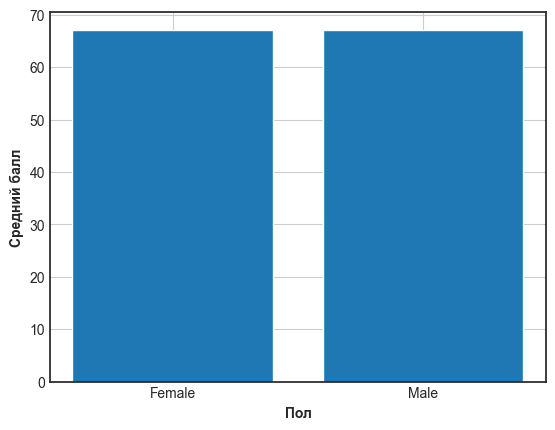

In [137]:
fig, ax = plt.subplots()
gens = df['gender'].unique()
counts = []
for gen in gens:
    counts.append(df['posttest'].loc[df['gender'] == gen].mean())
print(gens)
print(counts)
ax.bar(gens, counts)
plt.xlabel('Пол', fontweight='bold')
plt.ylabel('Средний балл', fontweight='bold')
plt.grid()
plt.show()

Здесь явно нет перевеса в какую-нибудь сторону, копаем дальше

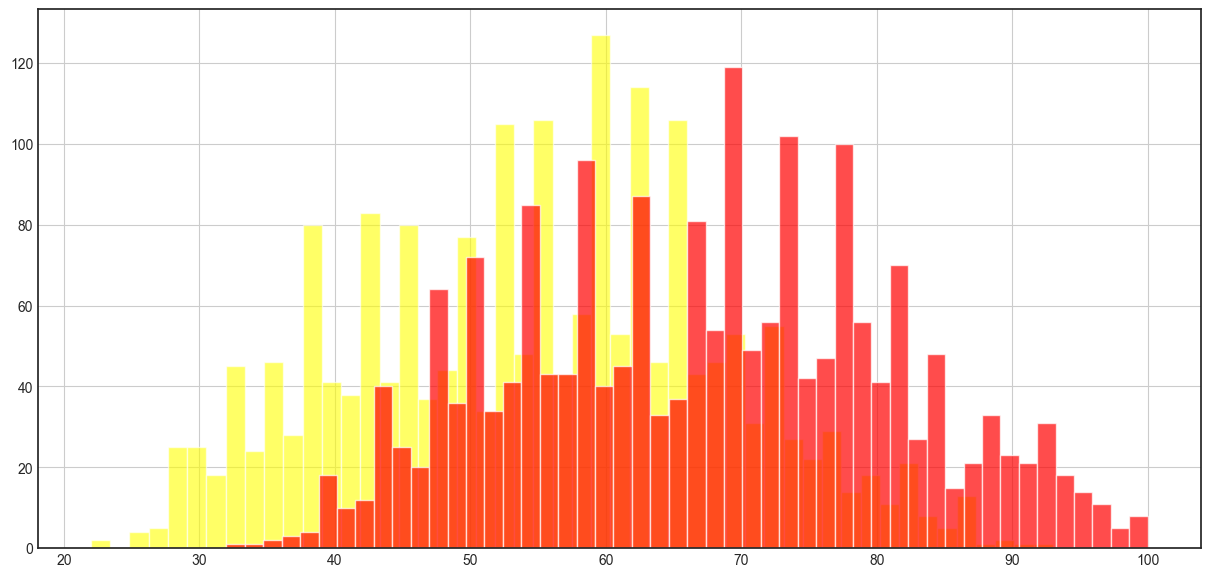

In [155]:
plt.figure(figsize=(15, 7))
pre_values = df['pretest']
post_values = df['posttest']
plt.hist(pre_values, bins=50, color='yellow' , alpha=0.6, label='Pretest')
plt.hist(post_values, bins=50, color='red' , alpha=0.7, label='Posttest')
plt.grid()
plt.show()

Видим довольно явную корреляцию оценки предварительного тестирования и послетестовой оценки

['Urban' 'Suburban' 'Rural']


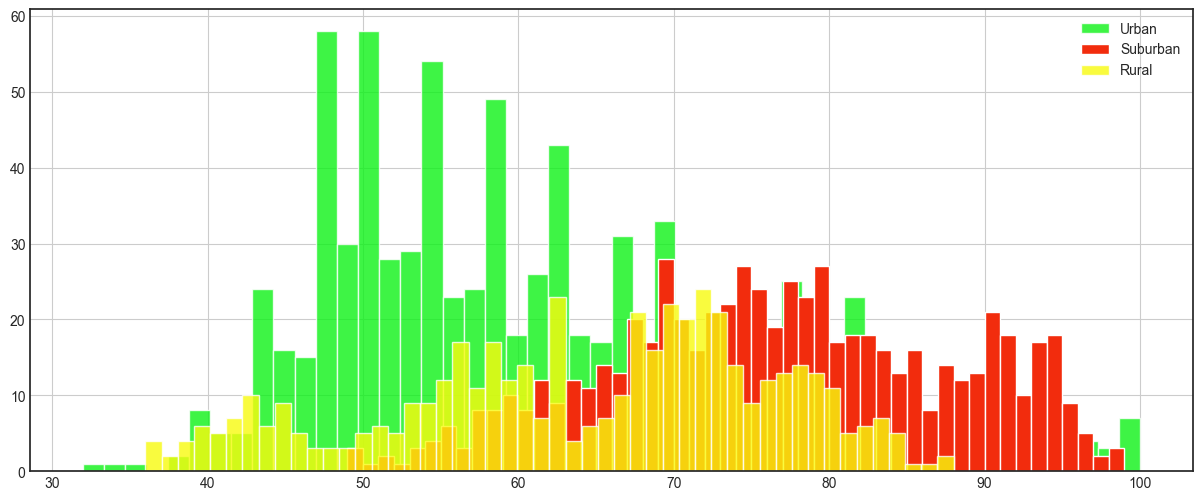

In [142]:
plt.figure(figsize=(15, 6))
post_values = df['posttest']
settings = df['school_setting'].unique()
print(settings)
setting0 = df.loc[df['school_setting'] == 'Urban']
setting1 = df.loc[df['school_setting'] == 'Suburban']
setting2 = df.loc[df['school_setting'] == 'Rural']
plt.hist(setting0.posttest, color='#0DF217', bins=50, alpha=0.8, label='Urban')
plt.hist(setting1.posttest, color='#F22C0D', bins=50, alpha=1, label='Suburban')
plt.hist(setting2.posttest, color='#F8FB0E', bins=50, alpha=0.8, label='Rural')
plt.grid()
plt.legend()
plt.show()

По графику видим, что в целом оценки учащихся городских школ ниже, чем сельских и пригородных. При этом учащиеся пригородных школ в основном явно показывают лучшие результаты

['Non-public' 'Public']


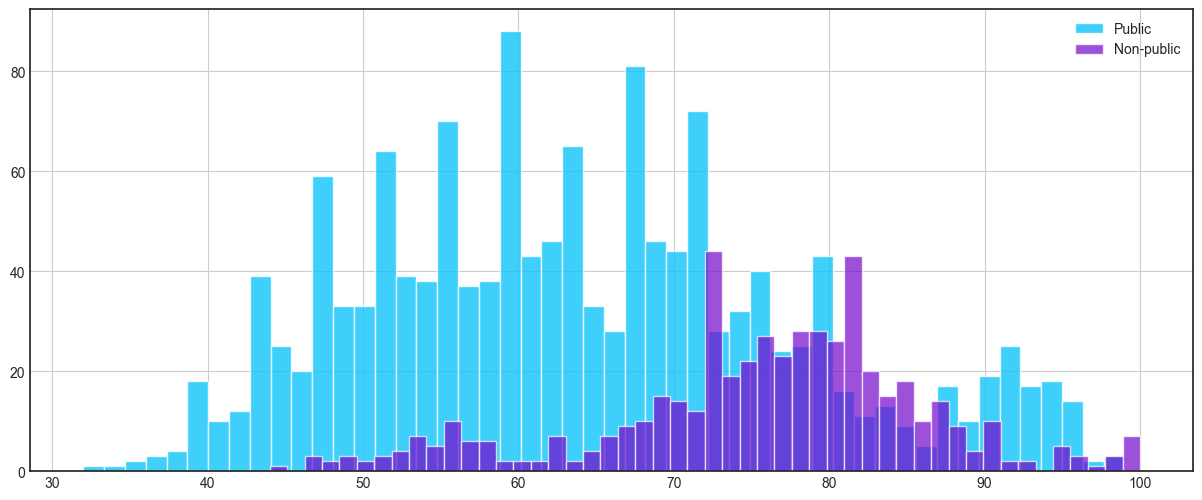

In [145]:
plt.figure(figsize=(15, 6))
post_values = df['posttest']
types = df['school_type'].unique()
print(types)
type0 = df.loc[df['school_type'] == 'Non-public']
type1 = df.loc[df['school_type'] == 'Public']
plt.hist(type1.posttest, color='#0EC5FB', bins=50, alpha=0.8, label='Public')
plt.hist(type0.posttest, color='#7406CB', bins=50, alpha=0.7, label='Non-public')
plt.grid()
plt.legend()
plt.show()

Учащиеся из частных школ показывают лучшие результаты по сравнению с учащимися общеобразовательных школ

['Standard' 'Experimental']


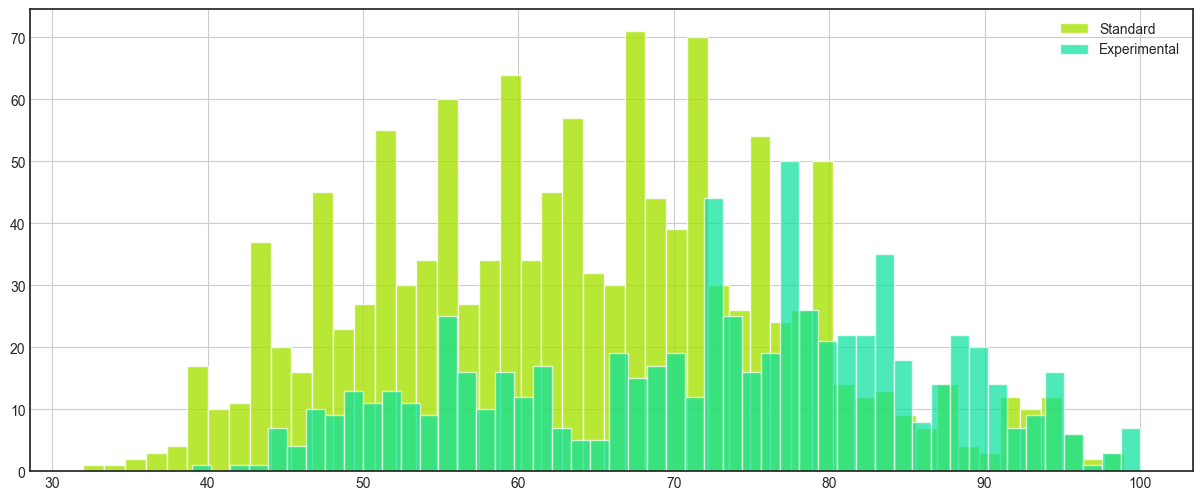

In [149]:
plt.figure(figsize=(15, 6))
post_values = df['posttest']
method = df['teaching_method'].unique()
print(method)
method0 = df.loc[df['teaching_method'] == 'Standard']
method1 = df.loc[df['teaching_method'] == 'Experimental']
plt.hist(method0.posttest, color='#A8E103', bins=50, alpha=0.8, label='Standard')
plt.hist(method1.posttest, color='#03E09A', bins=50, alpha=0.7, label='Experimental')
plt.grid()
plt.legend()
plt.show()

Из данного графика можно сделать вывод, что ученики с экспериментальным видом обучения показывают немного лучшие результаты, однако это не так значительно

['Does not qualify' 'Qualifies for reduced/free lunch']


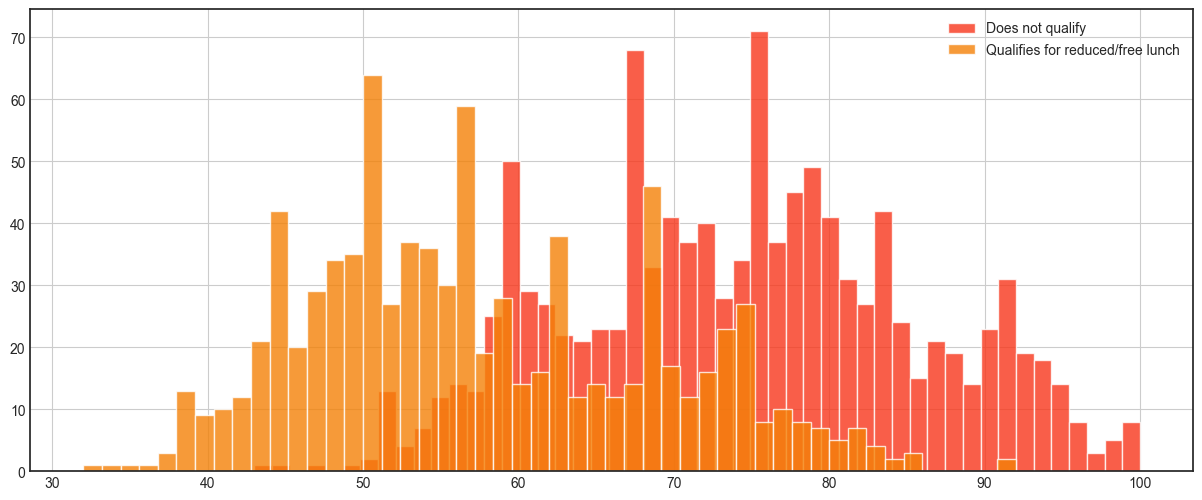

In [154]:
plt.figure(figsize=(15, 6))
post_values = df['posttest']
lunch = df['lunch'].unique()
print(lunch)
lunch0 = df.loc[df['lunch'] == 'Does not qualify']
lunch1 = df.loc[df['lunch'] == 'Qualifies for reduced/free lunch']
plt.hist(lunch0.posttest, color='#F8361B', bins=50, alpha=0.8, label='Does not qualify')
plt.hist(lunch1.posttest, color='#F48107', bins=50, alpha=0.8, label='Qualifies for reduced/free lunch')
plt.grid()
plt.legend()
plt.show()

Видим, что у тех учащихся, которым не предоставляется обед, оценка за тест, как правило, выше

In [158]:
df.school = pd.Categorical(df.school)
df = df.assign(code=df.school.cat.codes)
df.n_student = pd.Categorical(df.n_student)
df = df.assign(code=df.n_student.cat.codes)
df.lunch = pd.Categorical(df.lunch)
df = df.assign(code=df.lunch.cat.codes)
df

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest,code
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0,0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0,0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0,0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0,0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1979,ZOWMK,Urban,Public,ZBH,Standard,30.0,S4I5S,Male,Qualifies for reduced/free lunch,39.0,50.0,1
1980,ZOWMK,Urban,Public,ZBH,Standard,30.0,T8LSK,Female,Does not qualify,39.0,55.0,0
1981,ZOWMK,Urban,Public,ZBH,Standard,30.0,VNP26,Female,Qualifies for reduced/free lunch,38.0,46.0,1
1982,ZOWMK,Urban,Public,ZBH,Standard,30.0,YUEIH,Male,Qualifies for reduced/free lunch,46.0,53.0,1


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           1984 non-null   int8   
 1   school_setting   1984 non-null   int8   
 2   school_type      1984 non-null   int8   
 3   classroom        1984 non-null   int8   
 4   teaching_method  1984 non-null   int8   
 5   n_student        1984 non-null   float64
 6   student_id       1984 non-null   int16  
 7   gender           1984 non-null   int8   
 8   lunch            1984 non-null   int8   
 9   pretest          1984 non-null   float64
 10  posttest         1984 non-null   float64
dtypes: float64(3), int16(1), int8(7)
memory usage: 64.1 KB


In [79]:
df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
school,1984.0,11.295867,6.527158,0.0,6.00,11.0,17.00,22.0
school_setting,1984.0,1.182964,0.794771,0.0,1.00,1.0,2.00,2.0
school_type,1984.0,0.737399,0.440158,0.0,0.00,1.0,1.00,1.0
classroom,1984.0,48.003024,28.713708,0.0,23.00,48.0,73.00,96.0
teaching_method,1984.0,0.642137,0.479492,0.0,0.00,1.0,1.00,1.0
n_student,1984.0,22.769153,4.248477,14.0,20.00,22.0,27.00,31.0
student_id,1984.0,991.500000,572.875786,0.0,495.75,991.5,1487.25,1983.0
gender,1984.0,0.509577,0.500034,0.0,0.00,1.0,1.00,1.0
lunch,1984.0,0.427923,0.494902,0.0,0.00,0.0,1.00,1.0
pretest,1984.0,54.980847,13.558027,22.0,44.00,56.0,65.00,93.0


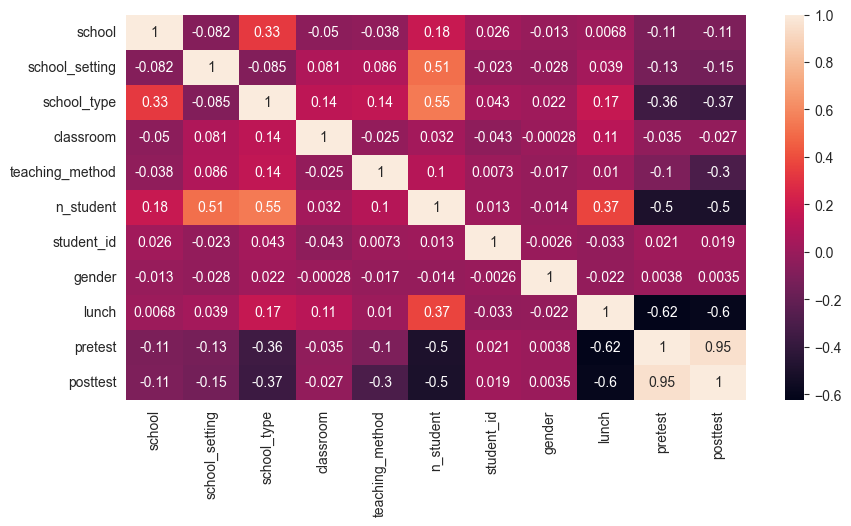

In [80]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.heatmap(corr, annot=True)
plt.show()

Видим явную корреляцию между оценками предварительного тестирования и послетестовыми оценками

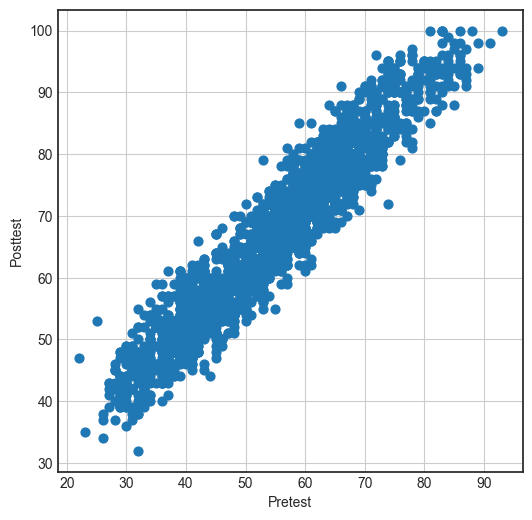

In [132]:
plt.figure(figsize=(6, 6))
plt.scatter(df['pretest'], df['posttest'], s=40)
plt.xlabel('Pretest')
plt.ylabel('Posttest')
plt.grid()
plt.show()

Доказательство вышесказанного

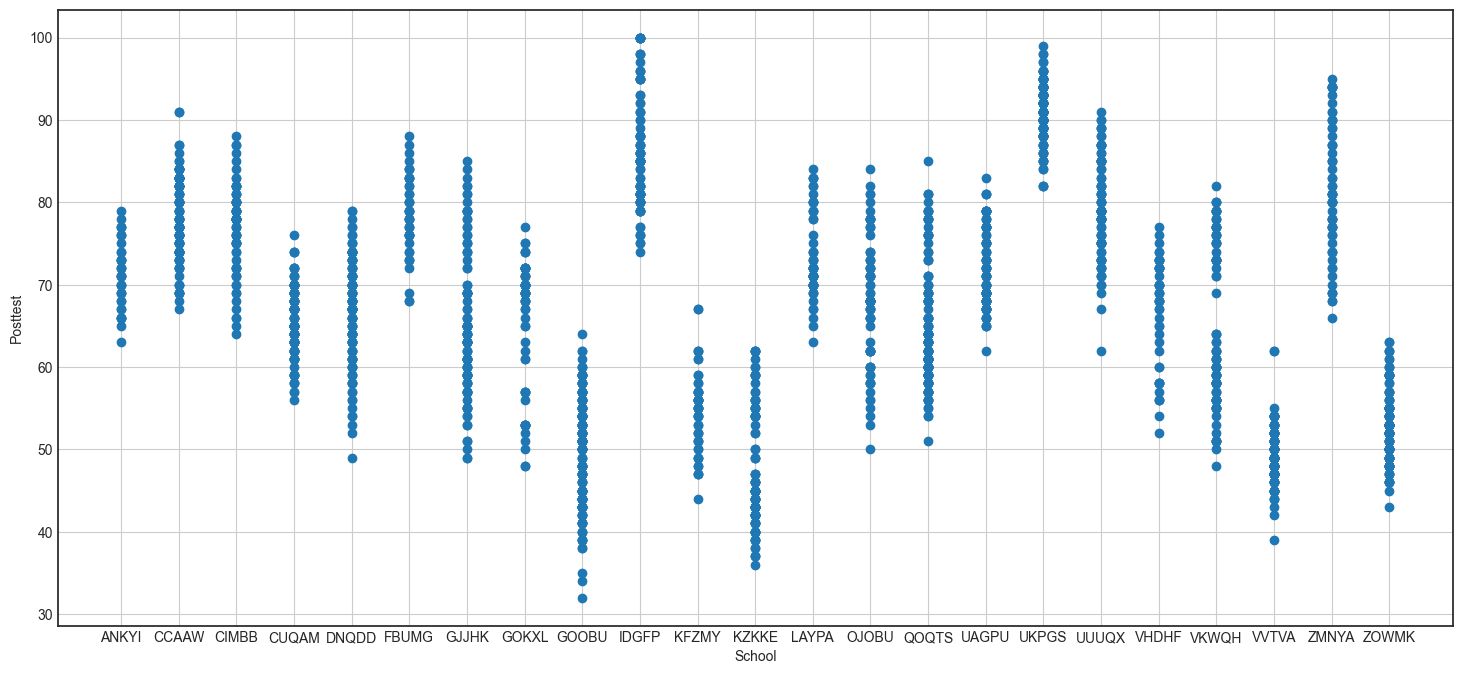

In [173]:
plt.figure(figsize=(18, 8))
plt.scatter(df['school'], df['posttest'])
plt.xlabel('School')
plt.ylabel('Posttest')
plt.grid()
plt.show()

Ну пусть это будет тут

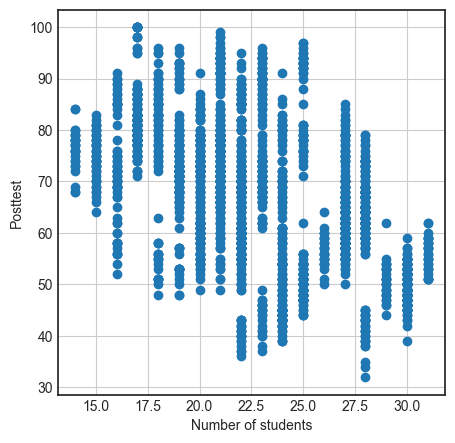

In [172]:
plt.figure(figsize=(5, 5))
plt.scatter(df['n_student'], df['posttest'])
plt.xlabel('Number of students')
plt.ylabel('Posttest')
plt.grid(True)
plt.show()

Ну, тут явно ничего полезного не нашли

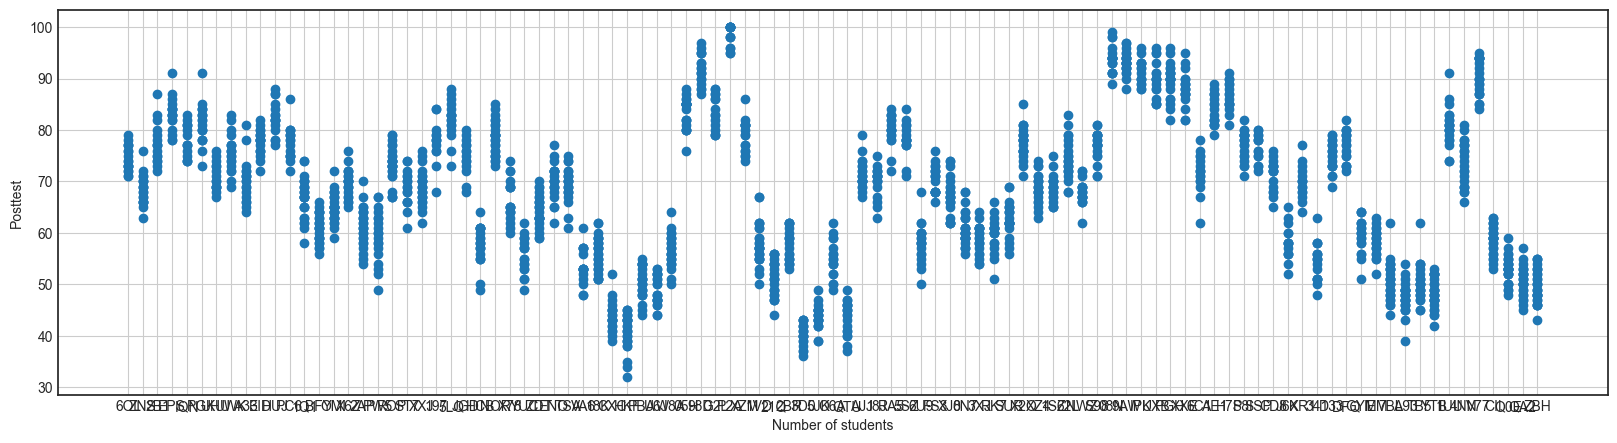

In [179]:
plt.figure(figsize=(20, 5))
plt.scatter(df['classroom'], df['posttest'])
plt.xlabel('Number of students')
plt.ylabel('Posttest')
plt.grid(True)
plt.show()

Итак, для обучения берем: school_setting, school_type, teaching_method, lunch, pretest(!!!)